## Necessary Imports

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#for visualization :
import matplotlib.pyplot as plt
import seaborn as sns
#To remove warnings:
import warnings
warnings.filterwarnings('ignore')

In [6]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

2.7.0


In [7]:
import cufflinks as cf

# For Notebooks
init_notebook_mode(connected=True)

# For offline use
cf.go_offline()

In [4]:
data = pd.read_excel('MP4.xlsx')

In [5]:
#  show first five rows of data
data.head()    

Company    P/E  ROCE %   Debt / Eq  CMP / BV  ROA 12M %   ROE %  \
0  Dalal Street Inv   2.37   501.92       0.00      4.35     327.64   11.20   
1    Hind. Unilever  62.71   108.62       0.00     53.73      65.51   77.57   
2     Castrol India  23.32   105.28       0.00     16.19      66.98   67.98   
3   Thomas Cook (I)  74.86   103.38       0.05      1.04      86.96  116.60   
4  Kay Power &Paper   0.16    93.18      37.73      3.83      60.54   54.50   

   EV / EBITDA  CMP / Sales  Prom. Hold. %   PEG  
0         1.98        10.80          57.12  0.03  
1        41.40        10.07          67.19  5.96  
2        13.62         4.23          51.00  2.68  
3        31.54         1.19          66.95  0.47  
4         0.83         0.07          44.83  0.00

In [6]:
#  show last five rows of data
data.tail()    

Company    P/E  ROCE %   Debt / Eq  CMP / BV  ROA 12M %  ROE %  \
1869   Jagsonpal Fin.  16.42   -23.83       0.00      4.15     -23.83 -23.83   
1870   Yarn Syndicate   1.21   -29.47       1.40      1.45     -30.64 -15.67   
1871  Quantum Digital   0.07   -33.89       0.50      0.56     -38.78  -1.90   
1872     Foundry Fuel   8.35   -57.43       0.45      0.97     -68.00 -12.80   
1873              IEL  19.90   -34.00       0.61      0.84      -1.74   2.35   

      EV / EBITDA  CMP / Sales  Prom. Hold. %   PEG  
1869        16.31        11.54          55.94  0.40  
1870         3.13         0.24          67.40 -0.10  
1871         2.37         0.06          48.09 -0.01  
1872         7.67         1.23          70.20 -0.76  
1873         9.75         0.60          65.72 -0.82

In [7]:
#  show various statistical values for the data
data.describe()

P/E      ROCE %     Debt / Eq     CMP / BV    ROA 12M %  \
count   1874.000000  1874.000000  1872.000000  1870.000000  1874.000000   
mean      45.300416    15.330640     0.953275     2.464235     8.451153   
std      400.033034    16.982478     6.099959     3.431952    11.713457   
min        0.030000   -57.430000     0.000000     0.000000   -68.000000   
25%        8.767500     7.332500     0.020000     0.680000     2.365000   
50%       15.065000    12.595000     0.330000     1.410000     6.205000   
75%       28.575000    20.125000     0.880000     2.970000    12.117500   
max    14671.000000   501.920000   252.220000    53.730000   327.640000   

             ROE %  EV / EBITDA  CMP / Sales  Prom. Hold. %          PEG  
count  1868.000000  1874.000000  1867.000000    1874.000000  1874.000000  
mean      9.696692    19.052241     3.359561      55.501377    -0.207737  
std     108.370346   181.560446    13.126593      17.761724    22.547411  
min   -4645.280000  -272.000000    -0.840000       0.000000  -424.690000  
25%       4.430000     5.470000     0.400000      46.170000    -0.140000  
50%      10.585000     8.220000     0.990000      58.820000     0.430000  
75%      17.272500    13.460000     2.515000      70.275000     1.387500  
max     116.600000  7332.500000   300.100000      99.060000   304.330000

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 11 columns):
Company          1874 non-null object
P/E              1874 non-null float64
ROCE %           1874 non-null float64
Debt / Eq        1872 non-null float64
CMP / BV         1870 non-null float64
ROA 12M %        1874 non-null float64
ROE %            1868 non-null float64
EV / EBITDA      1874 non-null float64
CMP / Sales      1867 non-null float64
Prom. Hold. %    1874 non-null float64
PEG              1874 non-null float64
dtypes: float64(10), object(1)
memory usage: 161.1+ KB


In [9]:
data.isna().sum()    #  Number of missing values in the data

Company          0
P/E              0
ROCE %           0
Debt / Eq        2
CMP / BV         4
ROA 12M %        0
ROE %            6
EV / EBITDA      0
CMP / Sales      7
Prom. Hold. %    0
PEG              0
dtype: int64

In [10]:
#drop the rows with missing values
data.dropna(inplace=True)

In [11]:
#  reset the index
data.reset_index(inplace=True,drop=True)

## Exploratory Data Analysis

In [12]:
X = data.loc[:,data.columns!='PEG']
y = data.loc[:,'PEG']

In [13]:
X.drop(['Company'],inplace=True,axis=1)

In [14]:
X['target'] = y.values

** Checking values falling within inter-quantile range in each column **

In [15]:
X[(X['ROE %']>=X['ROE %'].quantile(0.25)) & (X['ROE %']<=X['ROE %'].quantile(0.75))].head()

P/E  ROCE %   Debt / Eq  CMP / BV  ROA 12M %  ROE %  EV / EBITDA  \
0     2.37   501.92       0.00      4.35     327.64  11.20         1.98   
30   28.63    55.09       0.36      3.02       5.50   9.26        13.13   
62   17.58    42.83       0.00      3.31      18.61  12.50         6.77   
135   8.22    32.06       0.14      1.01      10.77  13.02         2.32   
166   5.27    29.52       0.20      0.31       8.99  10.27         0.15   

     CMP / Sales  Prom. Hold. %  target  
0          10.80          57.12    0.03  
30          0.95          39.90    8.02  
62          0.43          55.64    1.05  
135         0.13          44.66    0.41  
166         0.03          22.04    0.05

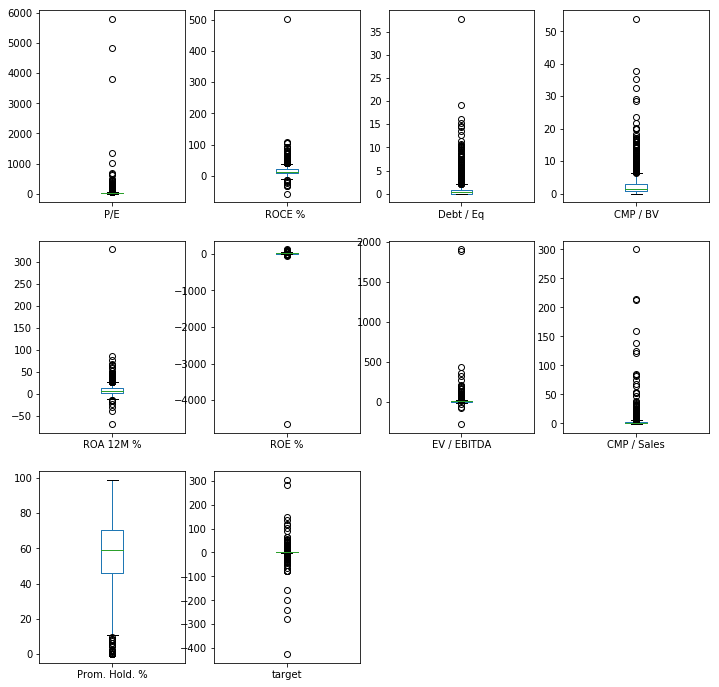

In [16]:
plt.figure(figsize=(12,12))
i = 1
for x in X.columns:
    plt.subplot(3,4,i)  # plt.subplot(nrows, ncols, plot_number)
    #plt.axis('off')
    X[x].plot.box()
    i = i+1

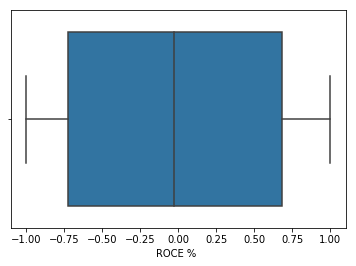

In [17]:
sns.boxplot(np.cos(X['ROCE % ']))

** After watching the boxplots for each variable,the following transformations were decided **

** Applying the transformations **

In [18]:
X.columns

Index(['P/E', 'ROCE % ', 'Debt / Eq', 'CMP / BV', 'ROA 12M %', 'ROE %',
       'EV / EBITDA', 'CMP / Sales', 'Prom. Hold. %', 'target'],
      dtype='object')

In [19]:
X.loc[:,'P/E'] = np.cos(X['P/E'])
X.loc[:,'ROCE % '] = np.cos(X['ROCE % '])
X.loc[:,'Debt / Eq'] = np.power(X['Debt / Eq'],1/6)
X.loc[:,'CMP / BV'] = np.cos(X['CMP / BV'])
X.loc[:,'ROA 12M %'] = np.power(X['ROA 12M %'],1/4)
X.loc[:,'ROE %'] = np.sin(X['ROE %'])
X.loc[:,'EV / EBITDA'] = np.sin(X['EV / EBITDA'])
X.loc[:,'CMP / Sales'] = np.log10(X['CMP / Sales'])
X.loc[:,'target'] = np.sin(X['target'])

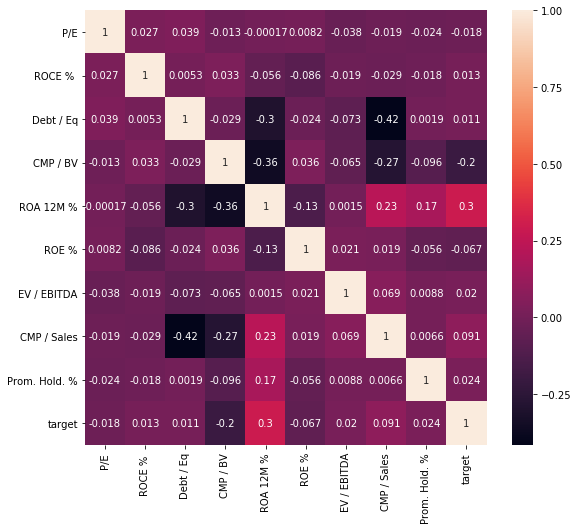

In [20]:
plt.figure(figsize=(9,8))
sns.heatmap(X.corr(),annot=True)

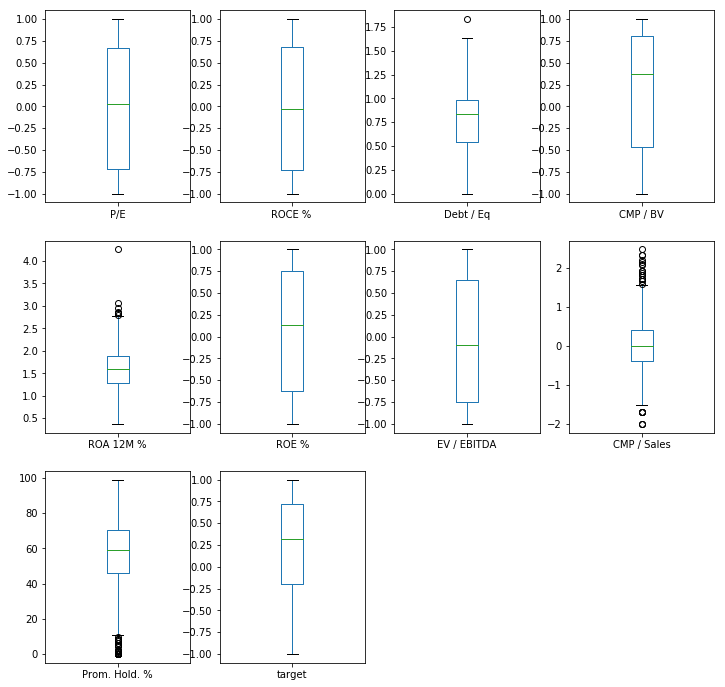

In [21]:
plt.figure(figsize=(12,12))
i = 1
for x in X.columns:
    plt.subplot(3,4,i)  # plt.subplot(nrows, ncols, plot_number)
    #plt.axis('off')
    X[x].plot.box()
    i = i+1

In [22]:
X.describe()

P/E      ROCE %     Debt / Eq     CMP / BV    ROA 12M %  \
count  1859.000000  1859.000000  1859.000000  1859.000000  1807.000000   
mean     -0.009967    -0.022596     0.707306     0.173014     1.572226   
std       0.700276     0.708587     0.402308     0.684350     0.425927   
min      -1.000000    -0.999999     0.000000    -0.999999     0.376060   
25%      -0.714421    -0.723585     0.539213    -0.463897     1.273471   
50%       0.030791    -0.025571     0.831290     0.371660     1.599780   
75%       0.664756     0.682384     0.978920     0.808028     1.873686   
max       0.999995     1.000000     1.831391     1.000000     4.254507   

             ROE %  EV / EBITDA  CMP / Sales  Prom. Hold. %       target  
count  1859.000000  1859.000000  1857.000000    1859.000000  1859.000000  
mean      0.060519    -0.047046         -inf      55.572200     0.216295  
std       0.700698     0.703662          NaN      17.677084     0.606821  
min      -0.999999    -0.999997         -inf       0.000000    -0.999992  
25%      -0.619911    -0.746765    -0.387216      46.175000    -0.198669  
50%       0.133232    -0.099392    -0.004365      58.870000     0.324043  
75%       0.754425     0.648202     0.401401      70.290000     0.718373  
max       1.000000     1.000000     2.477266      99.060000     1.000000

In [23]:
## A lot of outliers are present in each of the columns

** Converting null values to non null or infinite to finite **

In [49]:
np.nan_to_num(X,copy=True)

array([[-0.71680106,  0.74194838,  0.        , ..., -0.97917773,
         0.91743796,  0.0299955 ],
       [ 0.9925851 , -0.23289497,  0.        , ...,  0.82478188,
        -0.53058918, -0.31758857],
       [-0.23959133,  0.0366379 ,  0.        , ..., -0.90655037,
         0.86922339,  0.44537464],
       ...,
       [ 0.997551  , -0.7853598 ,  0.89089872, ..., -0.94630009,
         0.69727774, -0.00999983],
       [-0.47592754,  0.63612377,  0.87539102, ..., -0.23150983,
         0.98312307, -0.68892145],
       [ 0.49718579, -0.84857027,  0.92091944, ...,  0.71147335,
        -0.31951919, -0.73114583]])

In [50]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,mean_absolute_error,mean_squared_error

In [51]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
Xtrain,Xtest,ytrain,ytest = train_test_split(X.drop('target',axis=1),y)
for i in (Xtrain,Xtest,ytrain,ytest):
    print(i.shape)

(1394, 6)
(465, 6)
(1394,)
(465,)


### Predicting target values using Linear Regression to be further used for classification

In [52]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [53]:
X.columns

Index(['P/E', 'ROCE % ', 'Debt / Eq', 'CMP / BV', 'ROE %', 'EV / EBITDA',
       'target'],
      dtype='object')

In [47]:
X.drop(['ROA 12M %','CMP / Sales','Prom. Hold. %'],axis=1,inplace=True)

In [54]:
lr.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [55]:
ypred = lr.predict(Xtest)

In [56]:
mean_squared_error(ytest,ypred)

318.1744007555083

In [57]:
mean_absolute_error(ytest,ypred)

4.333263881398621

In [58]:
np.cos(ytest[:10])

1139    0.689498
1109    0.993601
1520    0.040785
585     0.731689
871     0.426660
1594    0.523366
1624    0.219007
1337    0.859342
124     0.908966
382     0.996802
Name: PEG, dtype: float64

In [59]:
np.cos(ypred[:10])

array([0.27163663, 0.99915683, 0.6308254 , 0.35024198, 0.97640176,
       0.77073345, 0.97405928, 0.97093795, 0.78935457, 0.93780889])

In [60]:
mean_absolute_error(ytest[:10],ypred[:10])

2.1068174387358143

#### Scaling the values using StandardScaler

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
sc = StandardScaler()

In [63]:
scaled_X = pd.DataFrame(sc.fit_transform(X.drop('target',axis=1)))
scaled_X.head()

0         1         2         3         4         5
0 -1.009635  1.079261 -1.758591 -0.771046 -1.484202  1.371034
1  1.432038 -0.296867 -1.758591 -1.638968  1.091010 -0.687366
2 -0.327993  0.083616 -1.758591 -1.547969 -1.380524  1.302496
3  1.240684 -1.319761 -0.249486  0.487026 -0.590708  0.242798
4  1.424385  0.712407  2.794842 -1.381644 -1.354008  1.115861

In [64]:
sc_y = sc.fit_transform(pd.DataFrame(y))

In [65]:
scXtrain,scXtest,scytrain,scytest = train_test_split(scaled_X,sc_y)
for i in (scXtrain,scXtest,scytrain,scytest):
    print(i.shape)

(1394, 6)
(465, 6)
(1394, 1)
(465, 1)


In [66]:
lr.fit(scXtrain,scytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [67]:
scypred = lr.predict(scXtest)

In [68]:
scypred[:10]

array([[-0.05134703],
       [ 0.00923617],
       [ 0.04512508],
       [ 0.1075376 ],
       [ 0.04491844],
       [-0.00503599],
       [ 0.03074895],
       [-0.02443725],
       [ 0.06232478],
       [ 0.04797395]])

In [69]:
scytest[:10]

array([[ 0.01180402],
       [-0.00310945],
       [ 0.00434729],
       [ 0.0938281 ],
       [-0.21438358],
       [-0.06077486],
       [ 0.0843829 ],
       [ 0.03566557],
       [ 0.00136459],
       [-0.00310945]])

In [70]:
mean_absolute_error(scytest[:10],scypred[:10])

0.06708052071434739

In [71]:
from sklearn.model_selection import KFold,cross_val_score
seed = 7
kfold = KFold(n_splits=10, random_state=seed)
model = LinearRegression()
scoring = 'r2'
results = cross_val_score(model, scaled_X, sc_y, cv=kfold, scoring=scoring)
print("R^2: %.3f (%.3f)" % (results.mean(), results.std()))

R^2: -0.033 (0.051)


In [72]:
results

array([-0.02778453, -0.17850723, -0.01559352, -0.03124978,  0.00754847,
       -0.05236739, -0.00535106,  0.00108167, -0.01209922, -0.01961113])

In [73]:
# print the intercept
print(lr.intercept_)

[0.0108921]


In [74]:
coeff_df = pd.DataFrame(lr.coef_.reshape(-1,1),X.drop('target',axis=1).columns,columns=['Coefficient'])
coeff_df

Coefficient
P/E            -0.014844
ROCE %         -0.040541
Debt / Eq       0.000279
CMP / BV       -0.003912
ROE %          -0.031460
EV / EBITDA    -0.005953

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **P/E** is associated with an **increase of 0.430897 **.
- Holding all other features fixed, a 1 unit increase in **ROCE %** is associated with an **increase of -0.026389 **.
- Holding all other features fixed, a 1 unit increase in **Debt / Eq** is associated with an **increase of -0.009677 **.
- Holding all other features fixed, a 1 unit increase in **CMP / BV	** is associated with an **increase of 0.062441 **.
- Similarly,for other columns as well.


In [75]:
ypred = lr.predict(scXtest)

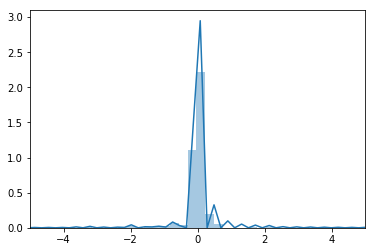

In [76]:
plt.xlim(-5,5)
sns.distplot((scytest-ypred),bins=100);

In [77]:
print('MAE:', mean_absolute_error(scytest, ypred))
print('MSE:', mean_squared_error(scytest, ypred))
print('RMSE:', np.sqrt(mean_squared_error(scytest, ypred)))

MAE: 0.26745056822913615
MSE: 1.2920332333274234
RMSE: 1.136676397805208


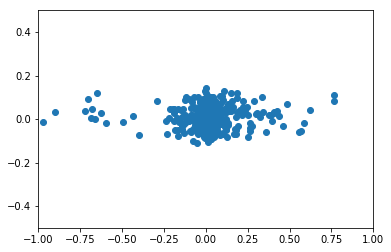

In [78]:
plt.xlim(-1,1)
plt.ylim(-0.5,0.5)
plt.scatter(scytest, ypred)

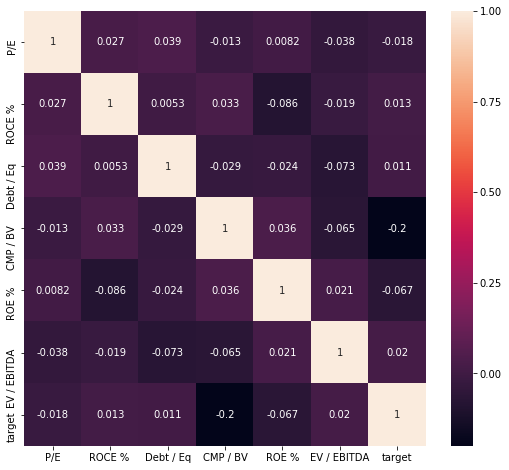

In [79]:
plt.figure(figsize=(9,8))
sns.heatmap(X.corr(),annot=True)

In [80]:
X['target'].value_counts().iplot(kind='bar')

## Decision Tree

In [81]:
# Reference for Decision Tree and Random Forest Classification(CART-Classification and Regression trees):
# https://www.stat.wisc.edu/~loh/treeprogs/guide/wires11.pdf
# Gini impurity:
# https://en.wikipedia.org/wiki/Decision_tree_learning

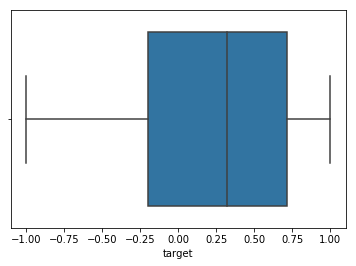

In [82]:
sns.boxplot(X['target'])

In [83]:
X.loc[X['target']>=X['target'].median(),'target'] = 1
X.loc[X['target']<X['target'].median(),'target'] = 0

In [84]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
Xtrain,Xtest,ytrain,ytest = train_test_split(X.drop('target',axis=1),X.target)
for i in (Xtrain,Xtest,ytrain,ytest):
    print(i.shape)

(1394, 6)
(465, 6)
(1394,)
(465,)


In [85]:
X.describe()

P/E      ROCE %     Debt / Eq     CMP / BV        ROE %  \
count  1859.000000  1859.000000  1859.000000  1859.000000  1859.000000   
mean     -0.009967    -0.022596     0.707306     0.173014     0.060519   
std       0.700276     0.708587     0.402308     0.684350     0.700698   
min      -1.000000    -0.999999     0.000000    -0.999999    -0.999999   
25%      -0.714421    -0.723585     0.539213    -0.463897    -0.619911   
50%       0.030791    -0.025571     0.831290     0.371660     0.133232   
75%       0.664756     0.682384     0.978920     0.808028     0.754425   
max       0.999995     1.000000     1.831391     1.000000     1.000000   

       EV / EBITDA       target  
count  1859.000000  1859.000000  
mean     -0.047046     0.501883  
std       0.703662     0.500131  
min      -0.999997     0.000000  
25%      -0.746765     0.000000  
50%      -0.099392     1.000000  
75%       0.648202     1.000000  
max       1.000000     1.000000

In [86]:
ytrain.describe()

count    1394.000000
mean        0.512195
std         0.500031
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [88]:
from sklearn.tree import DecisionTreeClassifier
max_accuracy = 0
best_x = 0
kf = KFold(n_splits=4)
depth = []
for x in range(1,200):
    dtc = DecisionTreeClassifier(max_depth=x,)
    dtc.fit(Xtrain,ytrain)
    Y_pred_rf = dtc.predict(Xtest)
    current_accuracy = round(accuracy_score(Y_pred_rf,ytest)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print("Max Accuracy:\t",max_accuracy)
print("Best Depth:\t",best_x)

Max Accuracy:	 57.42
Best Depth:	 1


In [89]:
dtc = DecisionTreeClassifier(max_depth=best_x)
dtc.fit(Xtrain,ytrain)
Y_pred_rf = dtc.predict(Xtest)

In [90]:
print(Y_pred_rf.shape)
score_rf = round(accuracy_score(Y_pred_rf,ytest)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

(465,)
The accuracy score achieved using Decision Tree is: 57.42 %


In [91]:
confusion_matrix(ytest,Y_pred_rf)

array([[111, 135],
       [ 63, 156]], dtype=int64)

In [92]:
print(classification_report(ytest,Y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.64      0.45      0.53       246
         1.0       0.54      0.71      0.61       219

   micro avg       0.57      0.57      0.57       465
   macro avg       0.59      0.58      0.57       465
weighted avg       0.59      0.57      0.57       465



In [93]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(X.columns[:-1])
features

['P/E', 'ROCE % ', 'Debt / Eq', 'CMP / BV', 'ROE %', 'EV / EBITDA']

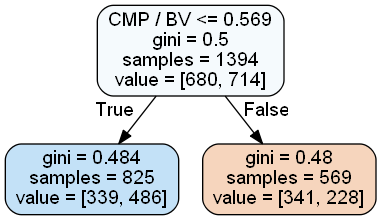

In [94]:
dot_data = StringIO()  
export_graphviz(dtc, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

In [95]:
confusion_matrix(ytrain,dtc.predict(Xtrain))

array([[341, 339],
       [228, 486]], dtype=int64)

### ADABoost Classifier

In [96]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=dtc,n_estimators=500, learning_rate=0.1, random_state=1)
ada.fit(Xtrain,ytrain)
y_test_pred = ada.predict(Xtest)
confusion_matrix(ytest,y_test_pred)

array([[126, 120],
       [ 86, 133]], dtype=int64)

## Random Forest Classifier:

In [97]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(1,50):
    rf = RandomForestClassifier(n_estimators=x)
    rf.fit(Xtrain,ytrain)
    Y_pred_rf = rf.predict(Xtest)
    current_accuracy = round(accuracy_score(Y_pred_rf,ytest)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(n_estimators=best_x)
rf.fit(Xtrain,ytrain)
Y_pred_rf = rf.predict(Xtest)

In [98]:
Y_pred_rf.shape
score_rf = round(accuracy_score(Y_pred_rf,ytest)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 54.62 %


In [99]:
best_x

46

In [100]:
confusion_matrix(ytest,Y_pred_rf)

array([[127, 119],
       [ 92, 127]], dtype=int64)

# K Nearest Neighbours:

In [101]:
scXtrain,scXtest,scytrain,scytest = train_test_split(scaled_X,X.target)
for i in (scXtrain,scXtest,scytrain,scytest):
    print(i.shape)

(1394, 6)
(465, 6)
(1394,)
(465,)


In [102]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=19)

knn.fit(scXtrain,scytrain)

pred = knn.predict(scXtest)

print("Confusion Matrix:\n",confusion_matrix(scytest,pred))

print("\nClassification Report:\n",classification_report(scytest,pred))

Confusion Matrix:
 [[134  95]
 [106 130]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.56      0.59      0.57       229
         1.0       0.58      0.55      0.56       236

   micro avg       0.57      0.57      0.57       465
   macro avg       0.57      0.57      0.57       465
weighted avg       0.57      0.57      0.57       465



In [103]:
error_rate = []

# Will take some time
for i in range(8,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scXtrain,scytrain)
    pred_i = knn.predict(scXtest)
    error_rate.append(np.mean(pred_i != scytest))

Text(0,0.5,'Error Rate')

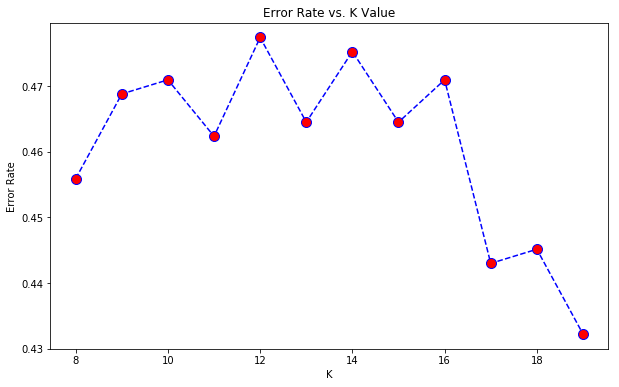

In [104]:
plt.figure(figsize=(10,6))
plt.plot(range(8,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# SVM with GridSearch

In [105]:
from sklearn.svm import SVC
model = SVC()
model.fit(scXtrain,scytrain)

predictions = model.predict(scXtest)
print(confusion_matrix(scytest,predictions))

param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

grid.fit(scXtrain,scytrain)

print("Best Grid Parameters:\n",grid.best_params_)

print("Best Esitmator\n",grid.best_estimator_)

grid_predictions = grid.predict(scXtest)

print(confusion_matrix(ytest,grid_predictions))

[[138  91]
 [110 126]]
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.48283261802575106, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5344827586206896, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5517241379310345, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.5708154506437768, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.5818965517241379, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.5862068965517241, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.575107296137339, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.5668103448275862, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.603448275862069, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.572961373390558, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ....

[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.603448275862069, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.4721030042918455, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.5301724137931034, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.4827586206896552, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.48497854077253216, total=   1.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.5107758620689655, total=   1.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    9.7s finished


# Principal Component Analysis

In [106]:
from sklearn.decomposition import PCA

In [107]:
pca = PCA(2)

In [108]:
scaled_X.shape

(1859, 6)

In [109]:
pca_scaled = pca.fit_transform(scaled_X)

In [110]:
pca_scaled = pd.DataFrame(pca_scaled,columns=['Component 1','Component 2'])
pca_scaled['target'] = X.target
pca_scaled.head()

Component 1  Component 2  target
0     0.898257     2.526314     0.0
1     0.734781    -0.186928     0.0
2     1.227465     2.468038     1.0
3     0.117998    -0.381878     1.0
4    -1.840715     1.943646     0.0

#### PCA Graph with 2 components

'axes = lm.axes\naxes[0,0].set_ylim(-20,40)'

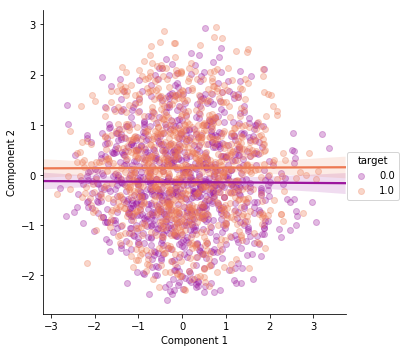

In [112]:
lm = sns.lmplot(x='Component 1',y='Component 2',data=pca_scaled,hue='target',palette='plasma',scatter_kws={'alpha':0.3})
'''axes = lm.axes
axes[0,0].set_ylim(-20,40)'''

In [113]:
pca = PCA(3)

In [114]:
pca_scaled = pca.fit_transform(scaled_X)

In [115]:
pca_scaled = pd.DataFrame(pca_scaled,columns=['C 1','C 2','C 3'])
pca_scaled['target'] = y.values
pca_scaled.head()

C 1       C 2       C 3  target
0  0.898257  2.526314  1.587503    0.03
1  0.734781 -0.186928 -0.903959    5.96
2  1.227465  2.468038  0.400565    2.68
3  0.117998 -0.381878 -0.531827    0.47
4 -1.840715  1.943646 -2.213553    0.00

#### PCA Graph with 3 components

In [116]:
pca_scaled.loc[:,['C 1','C 2','C 3']].iplot(kind='surface',colorscale='rdylbu')

### XGBoost Classifier

In [117]:
import xgboost
max_accuracy = 0
best_x = 0
for x in [0.1,0.01,1,10,100]:
    classifier = xgboost.XGBClassifier(max_depth=3,learning_rate=x)
    classifier.fit(Xtrain,ytrain)
    Y_pred_rf = classifier.predict(Xtest)
    current_accuracy = round(accuracy_score(Y_pred_rf,ytest)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

classifier = xgboost.XGBClassifier(max_depth=3,learning_rate=best_x)
classifier.fit(scXtrain,scytrain)
Y_pred_rf = classifier.predict(scXtest)

In [118]:
confusion_matrix(ytest,Y_pred_rf)

array([[126, 120],
       [107, 112]], dtype=int64)

In [119]:
print(classification_report(ytest,Y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.54      0.51      0.53       246
         1.0       0.48      0.51      0.50       219

   micro avg       0.51      0.51      0.51       465
   macro avg       0.51      0.51      0.51       465
weighted avg       0.51      0.51      0.51       465



** Decision Tree with more trials of depth **

In [124]:
from sklearn.tree import DecisionTreeClassifier

In [125]:
c = (ytrain >= 1).astype(int)

In [126]:
ctest = (ytest > 1).astype(int)

In [127]:
max_accuracy = 0
best_x = 0
kf = KFold(n_splits=4)
depth = []
for x in range(1,2000):
    dtc = DecisionTreeClassifier(max_depth=x, min_samples_leaf=10)
    dtc.fit(Xtrain,c)
    Y_pred_rf = dtc.predict(Xtest)
    current_accuracy = round(accuracy_score(Y_pred_rf,ctest)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print("Max Accuracy:\t",max_accuracy)
print("Best Depth:\t",best_x)

Max Accuracy:	 55.27
Best Depth:	 2


In [128]:
dtc = DecisionTreeClassifier(max_depth=best_x, min_samples_leaf=10)
dtc.fit(Xtrain,c)
Y_pred_rf = dtc.predict(Xtest)

In [159]:
print(Y_pred_rf.shape)
score_rf = round(accuracy_score(Y_pred_rf,ctest)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

(465,)
The accuracy score achieved using Decision Tree is: 77.63 %


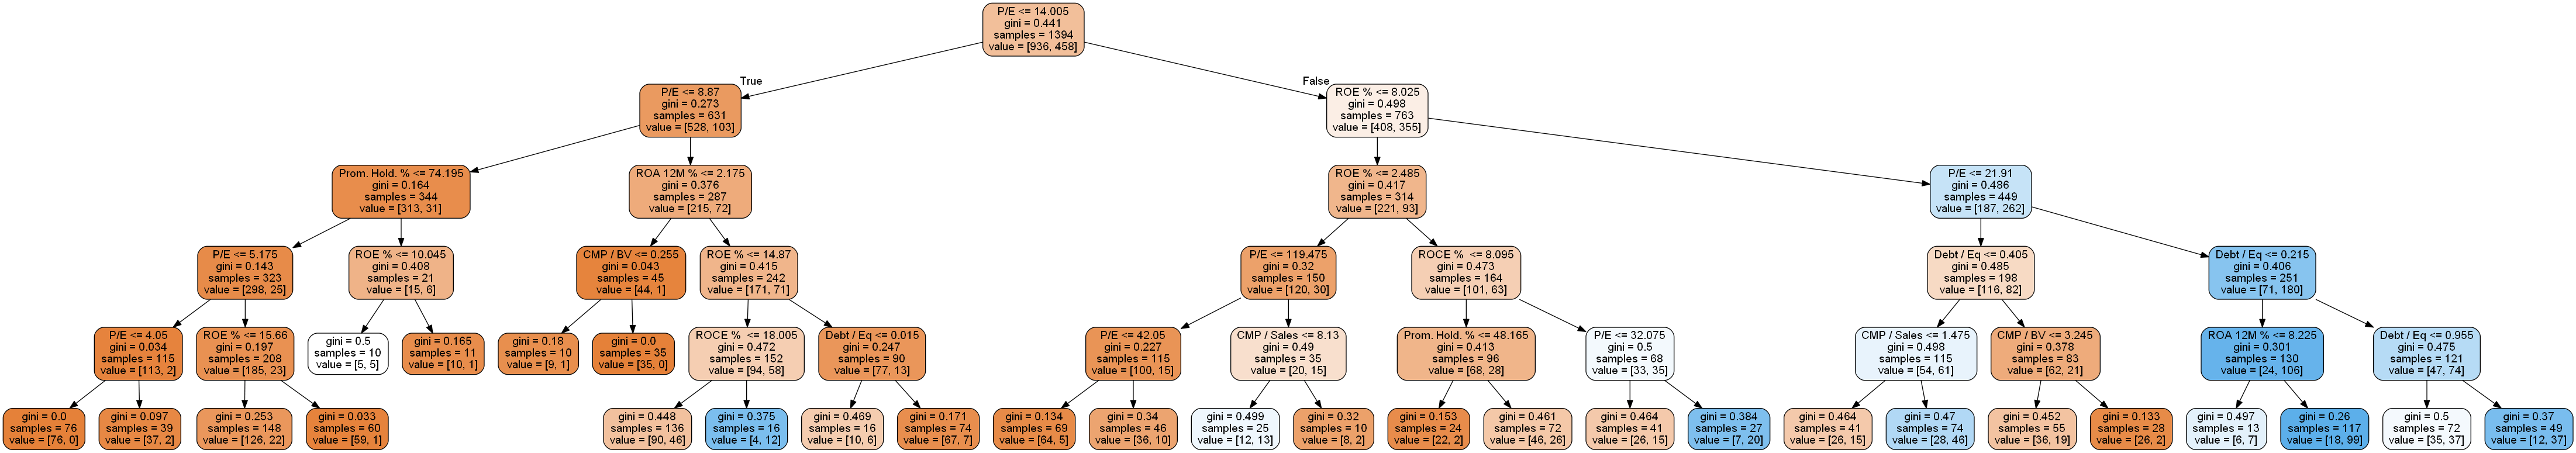

In [160]:
dot_data = StringIO()  
export_graphviz(dtc, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

## Exploratory Data Analysis 2

In [176]:
data  = pd.read_excel('MP4.xlsx')

In [177]:
data.head()

Company    P/E  ROCE %   Debt / Eq  CMP / BV  ROA 12M %   ROE %  \
0  Dalal Street Inv   2.37   501.92       0.00      4.35     327.64   11.20   
1    Hind. Unilever  62.71   108.62       0.00     53.73      65.51   77.57   
2     Castrol India  23.32   105.28       0.00     16.19      66.98   67.98   
3   Thomas Cook (I)  74.86   103.38       0.05      1.04      86.96  116.60   
4  Kay Power &Paper   0.16    93.18      37.73      3.83      60.54   54.50   

   EV / EBITDA  CMP / Sales  Prom. Hold. %   PEG  
0         1.98        10.80          57.12  0.03  
1        41.40        10.07          67.19  5.96  
2        13.62         4.23          51.00  2.68  
3        31.54         1.19          66.95  0.47  
4         0.83         0.07          44.83  0.00

In [178]:
#drop the rows with missing values
data.dropna(inplace=True)

In [179]:
#  reset the index
data.reset_index(inplace=True,drop=True)

** Checking for repeated rows **

In [180]:
data['Company'].value_counts()[:10]

Aqua Pumps Infra    1
Chordia Food        1
Fiem Inds.          1
KBS India           1
Mindtree            1
Northlink Fiscal    1
TCI Finance         1
Pansari Develop.    1
Sumeru Inds         1
T.V. Today Netw.    1
Name: Company, dtype: int64

** So we se there are no repeating rows in the data **

**   Now let's plot a regression plot between P/E ratio and PEG
**

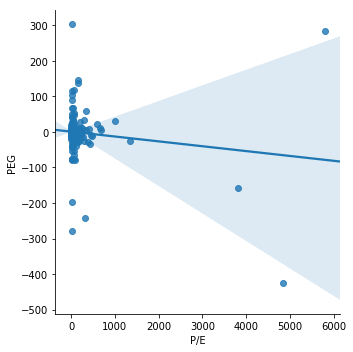

In [181]:
sns.lmplot(x='P/E',y='PEG',data=data)

In [182]:
data.loc[data.PEG >= 1,'target'] = 1
data.loc[data.PEG < 1,'target'] = 0

In [183]:
data.drop('PEG',axis=1,inplace=True)

In [184]:
data.target = data.target.astype('int64')

In [185]:
data.columns

Index(['Company', 'P/E', 'ROCE % ', 'Debt / Eq', 'CMP / BV', 'ROA 12M %',
       'ROE %', 'EV / EBITDA', 'CMP / Sales', 'Prom. Hold. %', 'target'],
      dtype='object')

(-20, 1000)

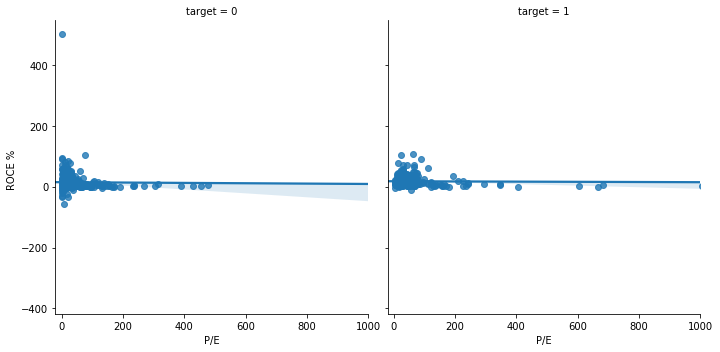

In [186]:
sns.lmplot(x='P/E',y='ROCE % ',data=data,col='target')
plt.xlim(-20,1000)

# Distribution Plots

Let's discuss some plots that would allow us to visualize the distribution of our data set. These plots are:


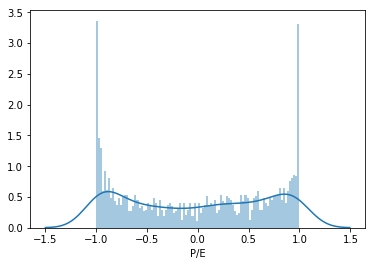

In [187]:
sns.distplot(np.cos(data['P/E']),bins=100)
#plt.xlim(-100,1000)
# Safe to ignore warnings

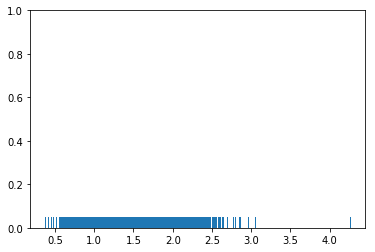

In [188]:
sns.rugplot(np.power(data['ROA 12M %'],1/4))

**rugplot**

rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

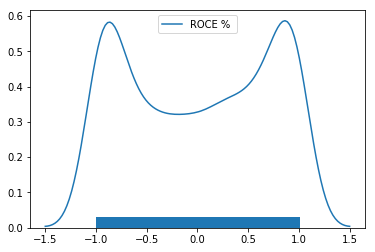

In [189]:
sns.kdeplot(np.sin(data['ROCE % ']))
sns.rugplot(np.sin(data['ROCE % ']))

In [190]:
data[['EV / EBITDA', 'CMP / Sales']].iplot(kind='spread')

In [191]:
#data.drop(['Company','P/E','Prom. Hold. %','Debt / Eq'],axis=1,inplace=True)
data.drop('Company',axis=1,inplace=True)

In [192]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
scdata = mms.fit_transform(data.drop('target',axis=1))

In [193]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(scdata,data.target)
for i in (Xtrain,Xtest,ytrain,ytest):
    print(i.shape)

(1394, 9)
(465, 9)
(1394,)
(465,)


In [194]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(Xtrain,ytrain)
Y_pred_rf = dtc.predict(Xtest)

In [195]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,Y_pred_rf)

array([[242,  80],
       [ 80,  63]], dtype=int64)

In [196]:
data.drop(data[data['P/E'] > data['P/E'].quantile(0.75)].index,inplace=True)

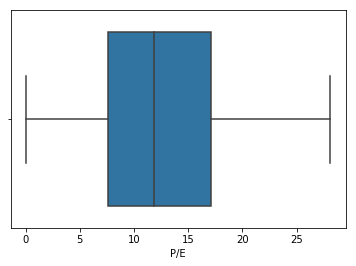

In [197]:
sns.boxplot(data['P/E'])

In [198]:
data.drop(data[data['ROCE % '] > data['ROCE % '].quantile(0.75)].index,inplace=True)

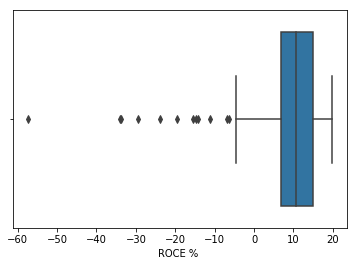

In [199]:
sns.boxplot(data['ROCE % '])

In [200]:
data.drop(data[data['ROCE % '] < -5].index,inplace=True)

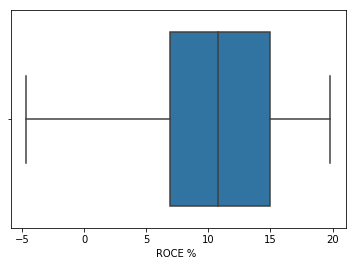

In [201]:
sns.boxplot(data['ROCE % '])

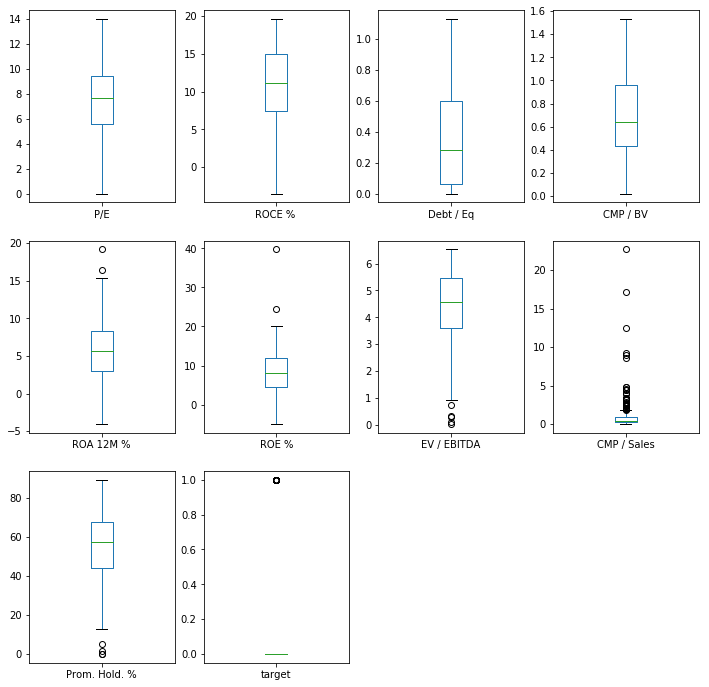

In [220]:
plt.figure(figsize=(12,12))
i = 1
for x in data.columns:
    plt.subplot(3,4,i)  # plt.subplot(nrows, ncols, plot_number)
    #plt.axis('off')
    data[x].plot.box()
    i = i+1

In [203]:
data.drop(data[data['Debt / Eq'] > data['Debt / Eq'].quantile(0.75)].index,inplace=True)

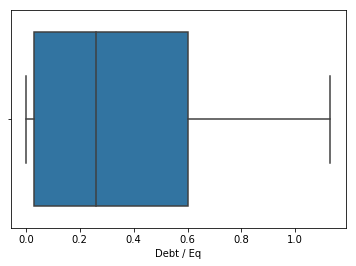

In [204]:
sns.boxplot(data['Debt / Eq'])

In [205]:
data.drop(data[data['CMP / BV'] > data['CMP / BV'].quantile(0.75)].index,inplace=True)
#'CMP / BV'

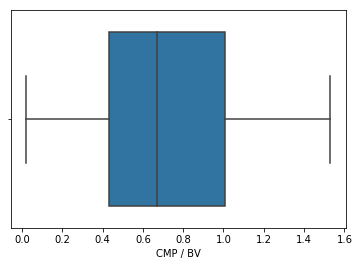

In [206]:
sns.boxplot(data['CMP / BV'])

In [207]:
data.drop(data[data['P/E'] > data['P/E'].quantile(0.75)].index,inplace=True)

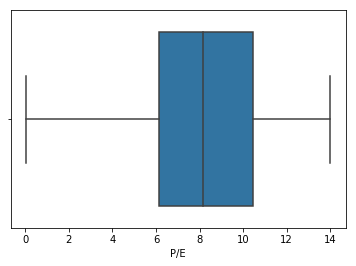

In [208]:
sns.boxplot(data['P/E'])

In [212]:
#'EV / EBITDA'
data.drop(data[data['EV / EBITDA'] > data['EV / EBITDA'].quantile(0.75)].index,inplace=True)

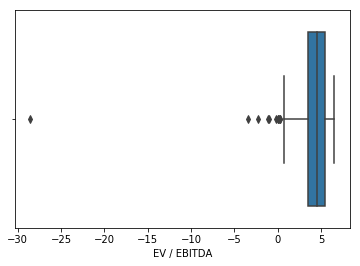

In [214]:
sns.boxplot(data['EV / EBITDA'])

In [217]:
data.drop(data[data['EV / EBITDA'] < 0].index,inplace=True)

In [218]:
sns.boxplot(data['EV / EBITDA'])

In [222]:
data.drop('CMP / Sales',axis=1,inplace=True)

In [223]:
#  reset the index
data.reset_index(inplace=True,drop=True)

In [224]:
dtc = DecisionTreeClassifier()

In [225]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(data.drop('target',axis=1),data.target)
for i in (Xtrain,Xtest,ytrain,ytest):
    print(i.shape)

(240, 8)
(81, 8)
(240,)
(81,)


In [233]:
from sklearn.metrics import accuracy_score
max_accuracy = 0
best_x = 0
depth = []
for x in range(1,200):
    dtc = DecisionTreeClassifier(max_depth=x,splitter='random',criterion='entropy')
    dtc.fit(Xtrain,ytrain)
    Y_pred_rf = dtc.predict(Xtest)
    current_accuracy = round(accuracy_score(Y_pred_rf,ytest)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print("Max Accuracy:\t",max_accuracy)
print("Best Depth:\t",best_x)

Max Accuracy:	 86.42
Best Depth:	 4


In [234]:
dtc.fit(Xtrain,ytrain)

Y_pred_rf = dtc.predict(Xtest)

confusion_matrix(ytest,Y_pred_rf)

array([[58,  9],
       [ 9,  5]], dtype=int64)

In [235]:
confusion_matrix(ytrain,dtc.predict(Xtrain))

array([[200,   0],
       [  0,  40]], dtype=int64)

In [237]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(data.columns[:-1])
features

['P/E',
 'ROCE % ',
 'Debt / Eq',
 'CMP / BV',
 'ROA 12M %',
 'ROE %',
 'EV / EBITDA',
 'Prom. Hold. %']

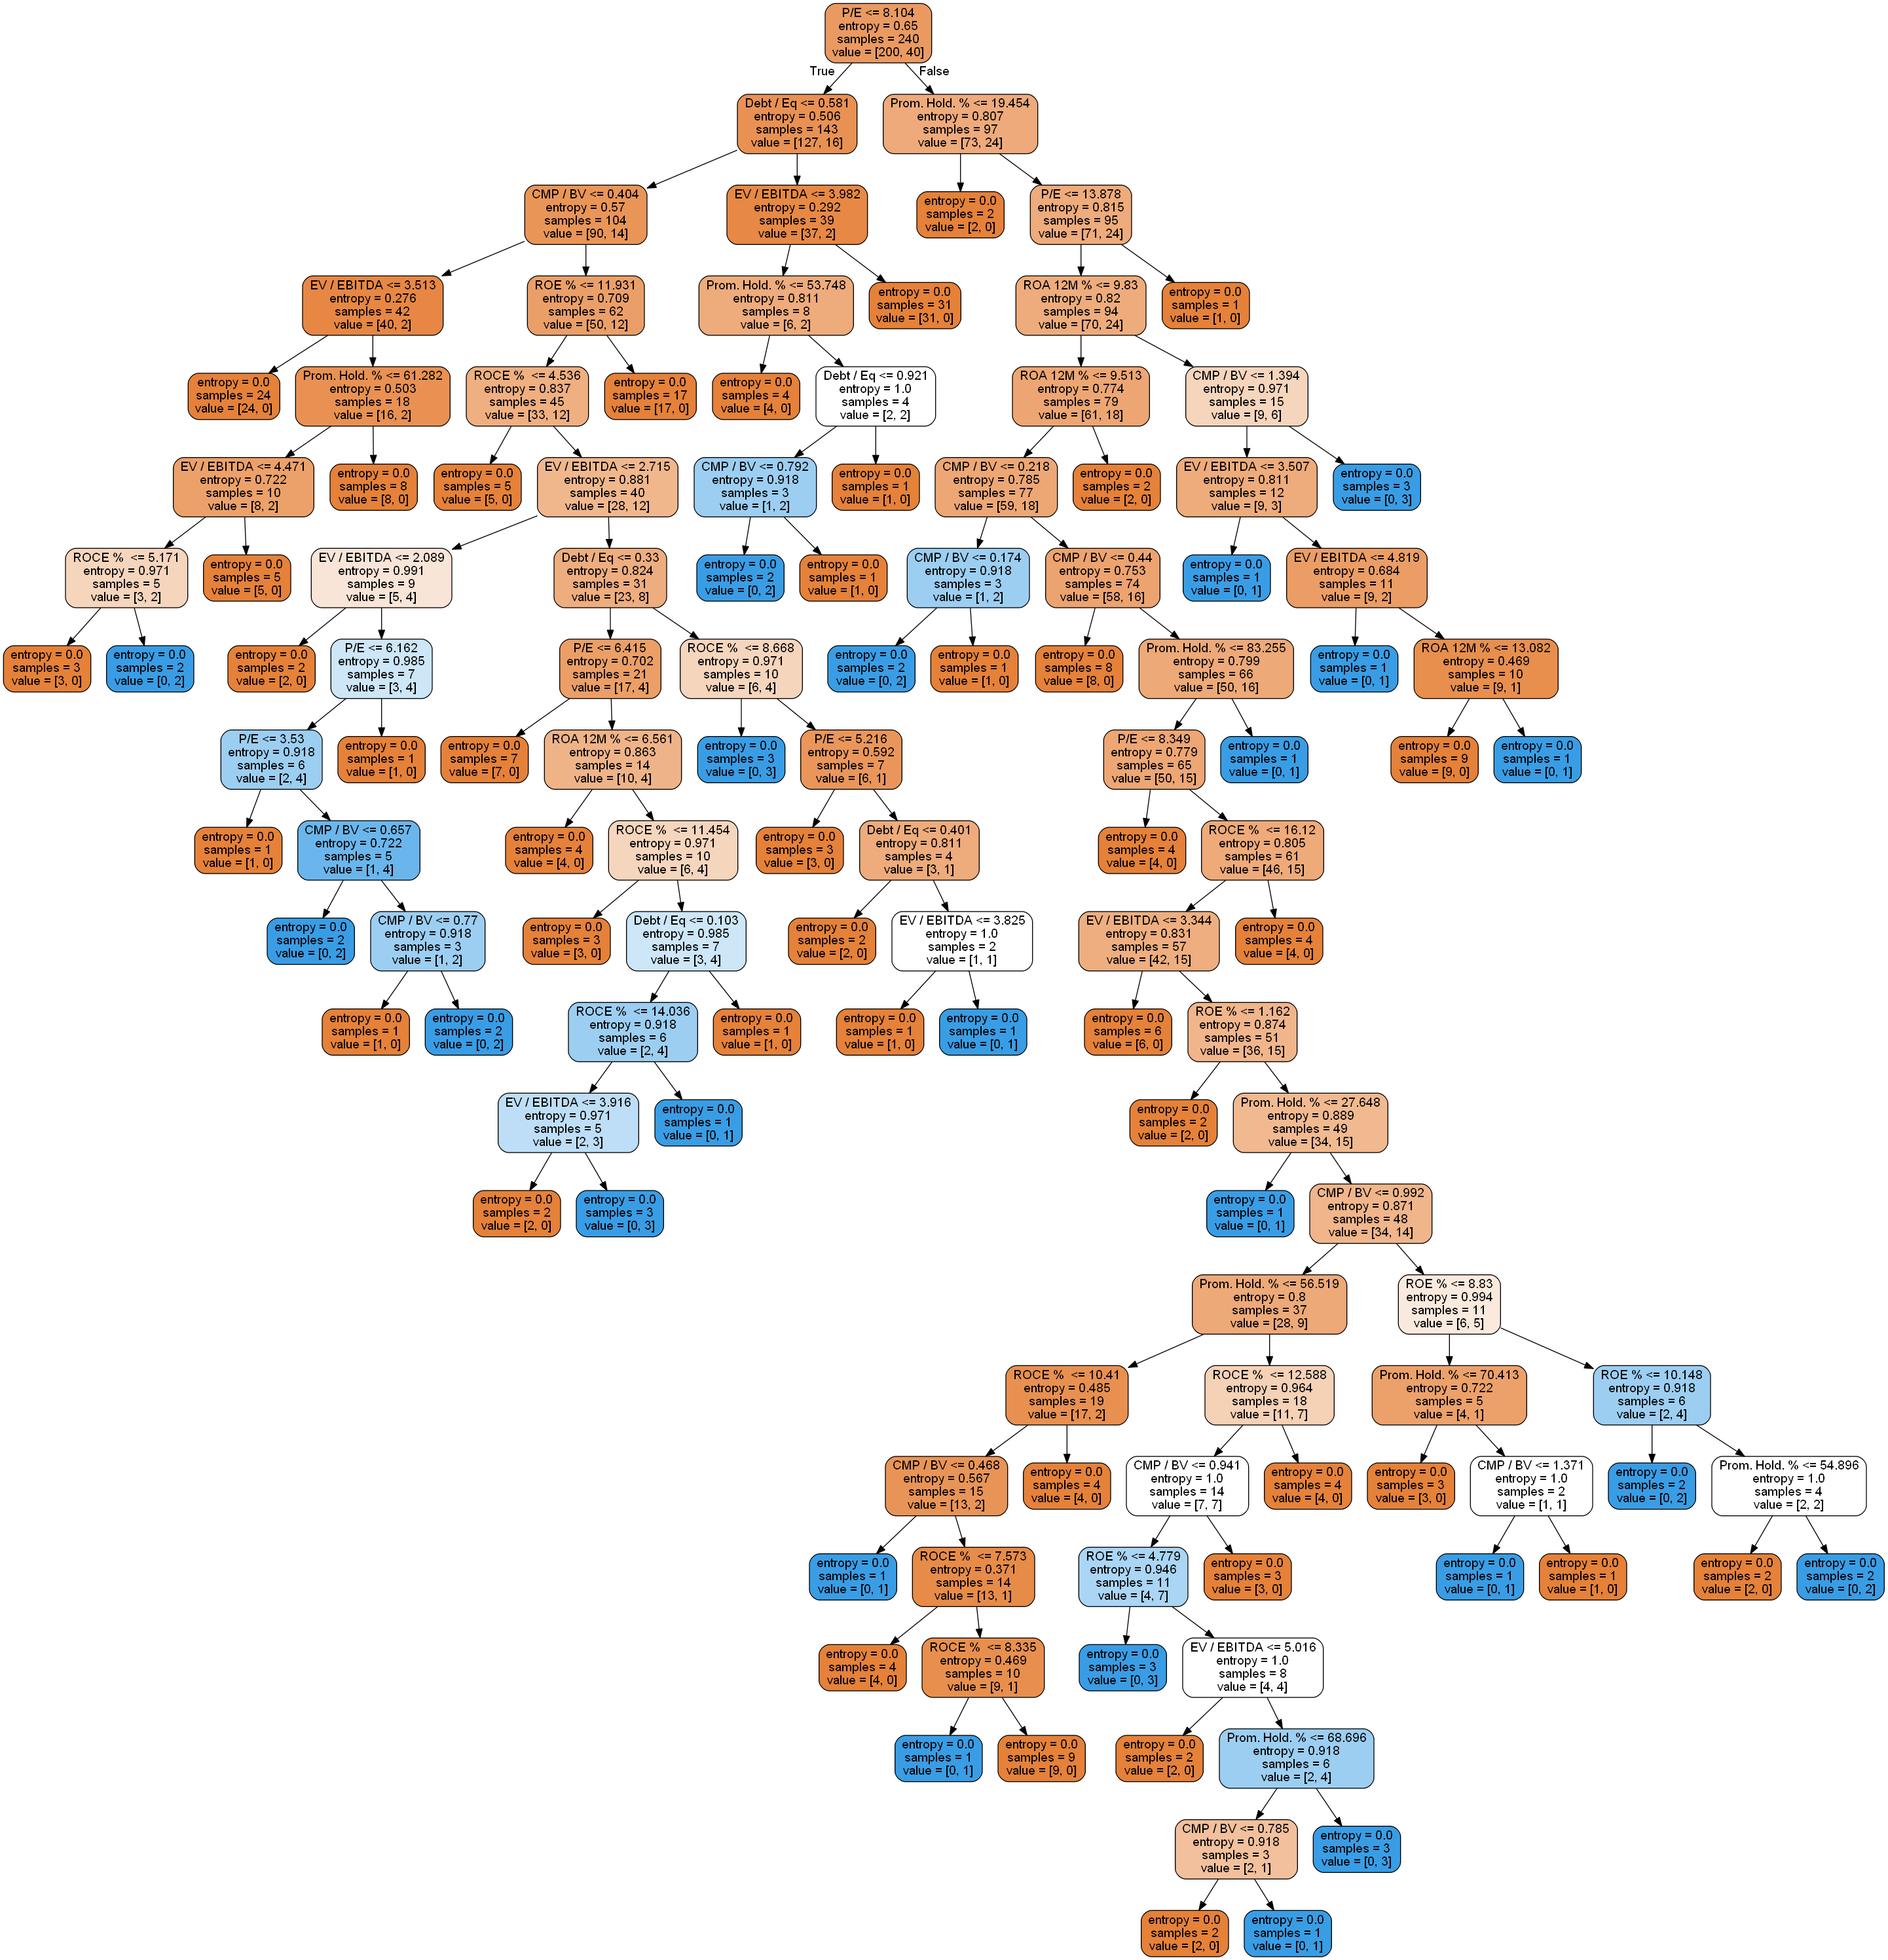

In [238]:
dot_data = StringIO()  
export_graphviz(dtc, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  